In [28]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('archive/fraud_data.csv')
data.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


In [3]:
data.describe()

,amt,lat,long,city_pop,merch_lat,merch_long
count,14446.000000,14446.000000,14446.000000,1.444600e+04,14446.000000,14446.000000
mean,124.430073,39.787692,-110.874225,1.065370e+05,39.787991,-110.874892
std,231.352587,5.317039,12.985813,2.902916e+05,5.360593,12.995596
min,1.000000,20.027100,-165.672300,4.600000e+01,19.032689,-166.670685
25%,12.080000,36.715400,-120.415800,4.930000e+02,36.794655,-120.146253
50%,51.520000,39.666200,-111.098500,1.645000e+03,39.620953,-111.192629
75%,101.030000,41.940400,-101.136000,3.543900e+04,42.275740,-100.446822
max,3261.470000,66.693300,-89.628700,2.383912e+06,67.510267,-88.646366


We can discard the longitude and latitude data for the time being and come back to it later

In [6]:
data_clean = data.drop(['lat', 'long', 'merch_lat', 'merch_long'], axis = 1)
data_clean.head()

,trans_date_trans_time,merchant,category,amt,city,state,city_pop,job,dob,trans_num,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,1


In [7]:
data_clean[['is_fraud']].value_counts()

is_fraud              
0                         12600
1                          1844
0"2019-01-01 00:00:44"        1
1"2020-12-24 16:56:24"        1
Name: count, dtype: int64

In [8]:
# check from how many states we have data
data_clean[['state']].value_counts()

state
CA       3375
MO       2329
NE       1460
OR       1211
WA       1150
WY       1100
NM       1003
CO        856
AZ        673
UT        597
ID        347
AK        173
HI        172
Name: count, dtype: int64

In [9]:
data_clean[['city']].value_counts()

city         
Phoenix          297
Centerview       197
Orient           192
Fort Washakie    187
Sutherland       187
                ... 
Downey            10
Wappapello         8
Buellton           8
Pleasant Hill      8
Vacaville          7
Name: count, Length: 176, dtype: int64

We have data from 13 different states and 176 different cities. Let's explore on a state level first.

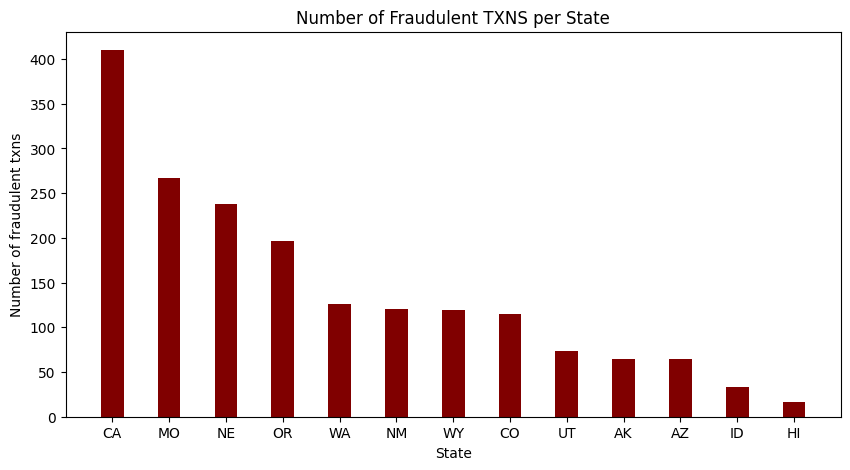

In [41]:
# see state and city distribtuion of fraudulent transactions
fraudulent_txs = data_clean[data_clean['is_fraud'] == '1']

# group by state and see count
fraudulent_txs_p_state = fraudulent_txs.groupby(['state'])['is_fraud'].agg(['count']).reset_index()
fraudulent_txs_p_state.sort_values(by='count', ascending=False, inplace=True)
fraudulent_txs_p_state.rename(columns = {'count': 'nr fraudulent txns'}, inplace=True)

# make a graph
fig = plt.figure(figsize = (10, 5))

plt.bar(fraudulent_txs_p_state['state'], fraudulent_txs_p_state['nr fraudulent txns'], color = 'maroon', width=0.4)
plt.xlabel('State')
plt.ylabel('Number of fraudulent txns')
plt.title('Number of Fraudulent TXNS per State')
plt.show()

In [56]:
total_txns_p_state = data_clean[['state']].value_counts().reset_index()
total_txns_p_state.rename(columns = {'count': 'total txns'}, inplace = True)

# join the fraudlunet txns per state and the total txns into 1 df
txns_joined_df = pd.merge(total_txns_p_state, fraudulent_txs_p_state, on='state', how='inner')

# create a % of fraudulent txns column
txns_joined_df['pctg of fraudulent txns from total'] = round((txns_joined_df['nr fraudulent txns']/txns_joined_df['total txns'])*100, 0)
txns_joined_df.sort_values(by='pctg of fraudulent txns from total', ascending=False, inplace=True)

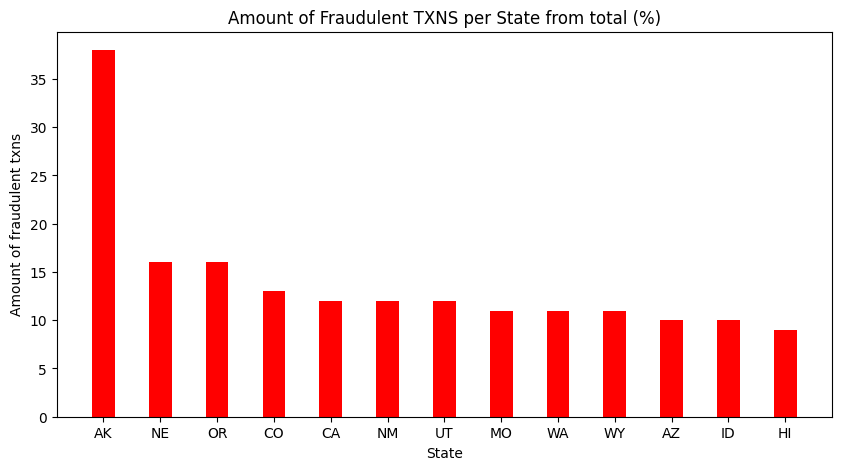

In [57]:
fig = plt.figure(figsize = (10, 5))

plt.bar(txns_joined_df['state'], txns_joined_df['pctg of fraudulent txns from total'], color = 'red', width=0.4)
plt.xlabel('State')
plt.ylabel('Amount of fraudulent txns')
plt.title('Amount of Fraudulent TXNS per State from total (%)')
plt.show()

We can see that in Alaska the largest amount of fraudulent txns occur.